In [2]:
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def getRoundSquare(n):
    i = 0
    m = n
    while (m != 1):
        m = m >> 1
        i = i + 1
    if (n == (1 << i)):
        return i
    return i+1

In [4]:
def complexUnityRoots(n):
    #gives and array of n complex unity roots clockwise;
    #n is multiple of 4
    W = np.empty(n, dtype=complex)
    for i in range(n >> 2) :
        W[i] = np.complex(str(np.cos((2*np.pi*i) / n)) + "+" + str(np.sin((2*np.pi*i) / n)) + "j")
        W[i + (n >> 1)] = - W[i]
        W[i + (n >> 2)] = np.complex(str(-W[i].imag) + "+" + str(W[i].real) +"j")
        W[i + (n >> 2) + (n >> 1)] = -W[i + (n >> 2)]
    W[1:] = W[1:][::-1]
    return W

In [5]:
def fft2(x):
    if x.size == 1:
        return x
    if x.size == 2:
        return recFFT2(x, 0, 2, np.array([-1,1], dtype=complex))
    n = getRoundSquare(x.size)
    W = np.empty(1 << n, dtype=complex)
    for i in range((1 << n) >> 2) :
        W[i] = np.complex(str(np.cos((2*np.pi*i) / (1 << n))) + "+" + str(np.sin((2*np.pi*i) / (1 << n))) + "j")
        W[i + ((1 << n) >> 1)] = - W[i]
        W[i + ((1 << n) >> 2)] = np.complex(str(-W[i].imag) + "+" + str(W[i].real) +"j")
        W[i + ((1 << n) >> 2) + ((1 << n) >> 1)] = -W[i + ((1 << n) >> 2)]
    print(W)
    return recFFT2(x, 0, 1<<n, W)

def recFFT2(x, n, n0, W):
    #n0 é tamanho inicial
    #W são todas as raízes n0 raízes da unidade
    if (x.size == 1) :
        return x
    impares = np.empty(x.size >> 1, dtype=complex)
    pares = np.empty(x.size >> 1, dtype=complex)
    res = np.empty(x.size, dtype=complex)
    for i in range(x.size) :
        if (i - ((i >> 1) << 1)) :
            impares[i >> 1] = x[i]
        else :
            pares[(i >> 1)] = x[i]
    res1 = recFFT2(pares, n+1, n0, W)
    res2 = recFFT2(impares, n+1, n0, W)
    #print(res1)
    #print(res2)
    for i in range(x.size >> 1):
        w = W[(n+1)*i]
        res[i] = res1[i] + w * res2[i]
        res[i + (x.size >> 1)] = res1[i] - w * res2[i]
    return res

In [6]:
def fft(x):
    if x.size == 1:
        return x
    if x.size == 2:
        return recFFT(x, 1, 1, np.array([-1,1], dtype=complex))
    n = getRoundSquare(x.size)
    W = complexUnityRoots(1 << n)
    #print(n)
    return recFFT(x, 0, n, W)

def recFFT(x, n, N, W):
    #2^n-esima raiz da un. de 2^N raízes
    if (n == N) :
        return x
    impares = np.empty(x.size >> 1, dtype=complex)
    pares = np.empty(x.size >> 1, dtype=complex)
    res = np.empty(x.size, dtype=complex)
    for i in range(x.size) :
        if (i - ((i >> 1) << 1)) :
            impares[i >> 1] = x[i]
        else :
            pares[(i >> 1)] = x[i]
    res1 = recFFT(pares, n+1, N, W)
    res2 = recFFT(impares, n+1, N, W)
    #print(res1)
    #print(res2)
    for i in range(x.size >> 1):
        #if n == N - 1:
         #   w =  
        w = W[((n+1)*i)]
        #print("n = " + str(n) + " e w= " + str(w) + " ; índice = " + str(((n+1)*i)))
        res[i] = res1[i] + w * res2[i]
        res[i + (x.size >> 1)] = res1[i] - w * res2[i]
    return res

In [7]:
def dftbruta(x):
    N = x.size
    n = getRoundSquare(N)
    W = complexUnityRoots(N)
    #print(W)
    res = np.zeros(N, dtype=complex)
    for i in range(N):
        for k in range(N):
            res[i] = res[i] + x[k] * W[(i*k) % N]
    return res

In [8]:
fft(np.array([1,2,3,4],dtype=complex))

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [9]:
dftbruta(np.array([1,2,3,4],dtype=complex))

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [10]:
def IBR(N, NU):
    x = 0
    for i in range(NU):
        c = N >> 1
        x = (x << 1) + (N - (c << 1))
        N = c
    return x

def FFTinplace(x):
    #x array de tamanho 2^gama
    N = x.size
    W = np.empty(N, dtype=complex)
    W = complexUnityRoots(N)
#     for i in range(N >> 2) :
#         W[i] = np.complex(str(np.cos((2*np.pi*i) / N)) + "+" + str(np.sin((2*np.pi*i) / N)) + "j")
#         W[i + (N >> 1)] = - W[i]
#         W[i + (N >> 2)] = np.complex(str(-W[i].imag) + "+" + str(W[i].real) +"j")
#         W[i + (N >> 1) + (N >> 2)] = -W[i + (N >> 2)]
#     print(W)
    NU = getRoundSquare(N)
    N2 = N >> 1
    NU1 = NU - 1
    k = 0
    for l in range(NU):
        while (k < N-1):
            for i in range(N2):
                M = k >> NU1 #(int(k/2**NU1))
                P = IBR(M, NU)
                T1 = W[P] * x[k+N2]
                x[k+N2] = x[k] - T1
                x[k] = x[k] + T1
                k += 1
            k += N2
        N2 >>= 1 # N2 /= 2^1
        NU1 -= 1
        k = 0
    while (k != N-1):
        i = IBR(k, NU)
        if (i > k):
            T1 = x[k]
            x[k] = x[i]
            x[i] = T1
        k += 1
    return x

In [11]:
y = np.array([0,1,2,3,4,5,6,7],dtype=complex)
FFTinplace(y.copy())

array([28.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        , -4.-1.65685425j, -4.-4.j        , -4.-9.65685425j])

In [12]:
np.fft.fft([0,1,2,3,4,5,6,7])

array([28.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        , -4.-1.65685425j, -4.-4.j        , -4.-9.65685425j])

In [15]:
def meufft2(x):
    #x um ndarray uint8 com dimensões potencias de 2
    x = np.array(x, dtype='complex128')
    [M,N] = x.shape
    for i in range(M):
        FFTinplace(x[i])
    return x

<Figure size 1440x720 with 0 Axes>

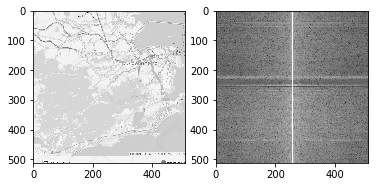

<Figure size 1440x720 with 0 Axes>

In [16]:
addasd = cv2.imread('457t.jpg',0)
M = meufft2(addasd)
Ma = 20*np.log(np.abs(M))
Mt = np.fft.fftshift(Ma)

plt.subplot(121),plt.imshow(addasd, cmap = 'gray')
plt.subplot(122),plt.imshow(Mt, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

In [17]:
# a partir daqui, vou usar a FFT do numpy por ser mais rápida e mais precisa (o algoritmo apresenta erros numericos com arrays grandes eu acredito),
# além de funcionar com valores que não são potência de 2

In [18]:
#definindo alguns filtros de frequência:
def passaAltaGauss(M,N,u,v,desv):
    #filtro passa alta dominio de frequencia de figura com tamanho MxN
    D2 = (u - M/2)**2 + (v - N/2)**2
    return 1 - np.exp(-D2/(2*desv**2))

def passaBaixaGauss(M,N,u,v,desv):
    D2 = (u - M/2)**2 + (v - N/2)**2
    return np.exp(-D2/(2*desv**2))

def passaBaixaButterworth(M,N,u,v,D0,n):
    D2 = (u - M/2)**2 + (v - N/2)**2
    return 1 / (1 + (D2/(D0**2))**n)

def passaBaixaButterworth(M,N,u,v,D0,n):
    D2 = (u - M/2)**2 + (v - N/2)**2
    return 1 / (1 + (D2/(D0**2))**n)

<Figure size 1440x720 with 0 Axes>

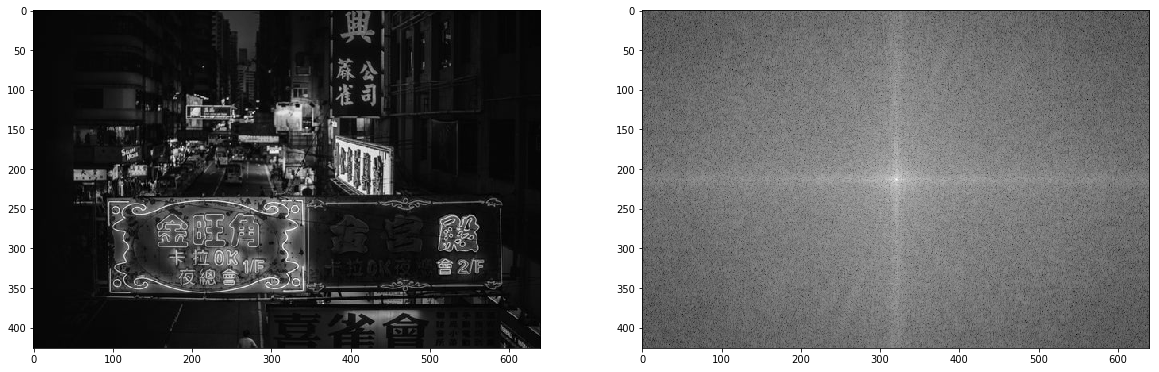

<Figure size 1440x720 with 0 Axes>

In [19]:
img = cv2.imread('teste3.jpg',0)
# 426x640
M = 426
N = 640
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

In [20]:
for i in range(M):
    for j in range(N):
        fshift[i][j] = fshift[i][j] * passaAltaGauss(M,N,i,j,190)

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1440x720 with 0 Axes>

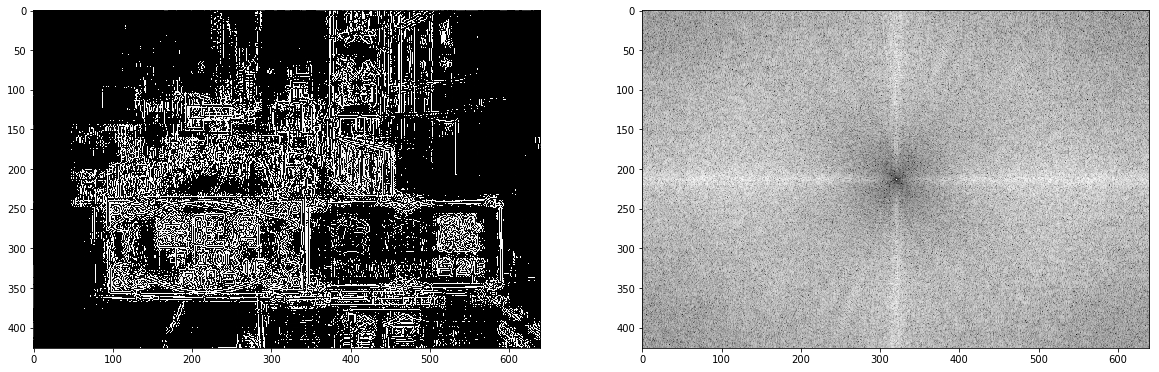

<Figure size 1440x720 with 0 Axes>

In [21]:
magnitude_spectrum2 = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(fshift))), cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


<Figure size 1440x720 with 0 Axes>

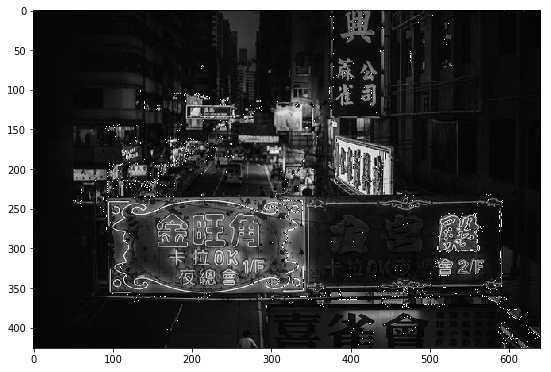

<Figure size 1440x720 with 0 Axes>

In [22]:
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(f + np.fft.ifftshift(fshift))), cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

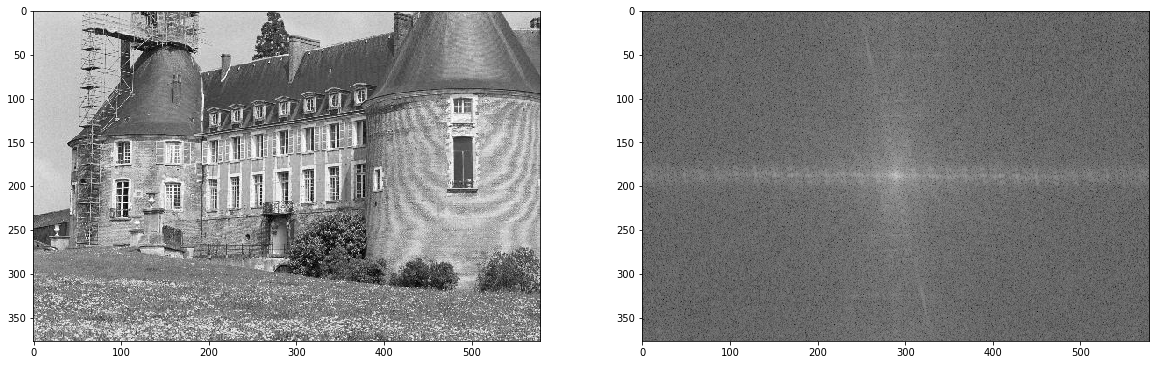

<Figure size 1440x720 with 0 Axes>

In [23]:
img2 = cv2.imread('alias-ex.jpg',0)
[M2, N2] = img2.shape
f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))

plt.subplot(121),plt.imshow(img2, cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10]) 
plt.figure(figsize=(20,10))

In [24]:
#tentando tirar o alias:
nfshift2 = fshift2.copy()
for i in range(0,150):
    for j in range(0,N2):
        nfshift2[i,j] = 0.00005
        nfshift2[376-i,j] = 0.00005
        nfshift2[i,578-j] = 0.00005
        nfshift2[376-i,578-j] = 0.00005

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


<Figure size 1440x720 with 0 Axes>

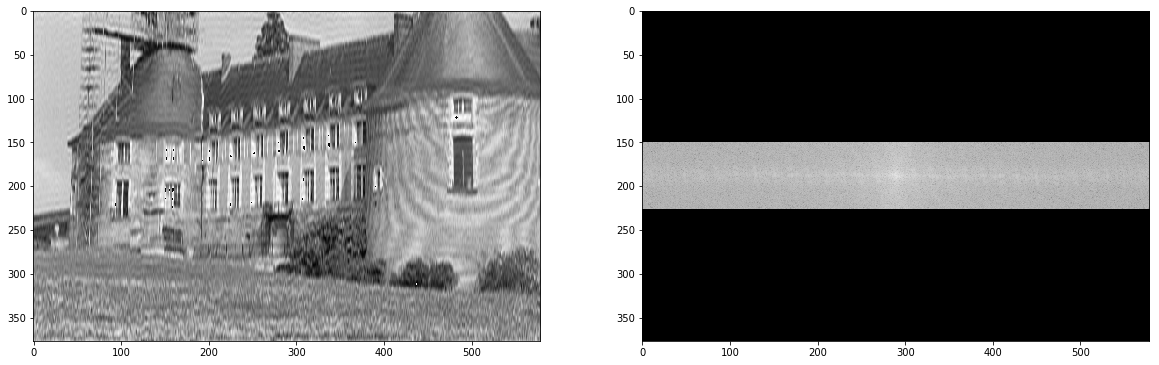

<Figure size 1440x720 with 0 Axes>

In [25]:
#o alias da parte de cima é mascarado; mas cria um serrilhado por ter usado um filtro muito ideal
#(transformada de fourier de um sinal retangular é a função sinc)
ms = 20*np.log(np.abs(nfshift2))
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(nfshift2))), cmap = 'gray')
plt.subplot(122),plt.imshow(ms, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

In [26]:
DAT = fshift2.copy()
for i in range(M2):
    for j in range(N2):
        DAT[i,j] = DAT[i,j] * passaAltaGauss(M,N,i,j,80)

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


<Figure size 1440x720 with 0 Axes>

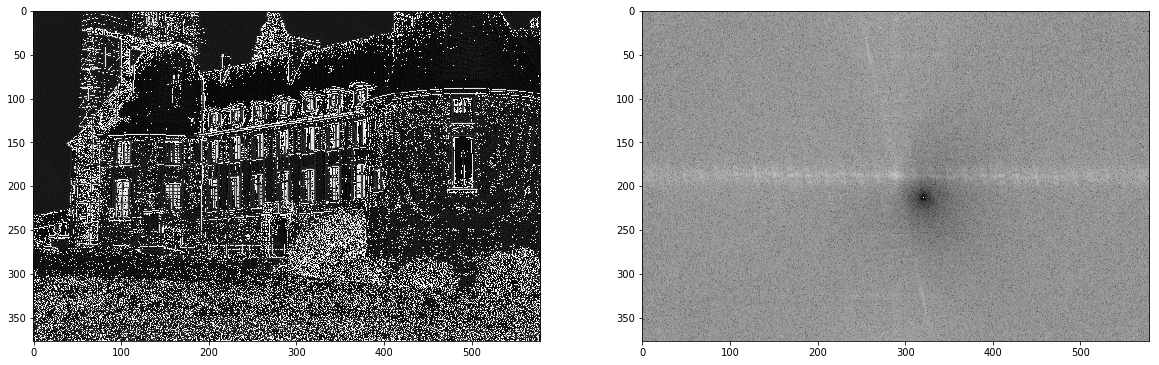

<Figure size 1440x720 with 0 Axes>

In [27]:
#filtro passa-alta retorna áreas com maior frequência da imagem
#a frequência está associada a mudanças abruptas no tom.
#assim, filtros que passam as altas frequências funcionam como detectores de arestas
msab = 20*np.log(np.abs(DAT))
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(DAT))), cmap = 'gray')
plt.subplot(122),plt.imshow(msab, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

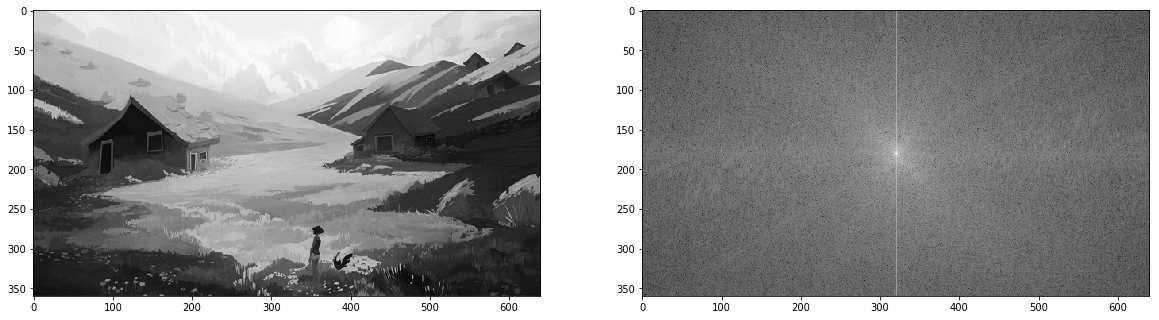

<Figure size 1440x720 with 0 Axes>

In [28]:
img4 = cv2.imread('teste4.png',0)
(M4, N4) = img4.shape
f4 = np.fft.fft2(img4)
fshift4 = np.fft.fftshift(f4)
magnitude_spectrum = 20*np.log(np.abs(fshift4))

plt.subplot(121),plt.imshow(img4, cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


<Figure size 1440x720 with 0 Axes>

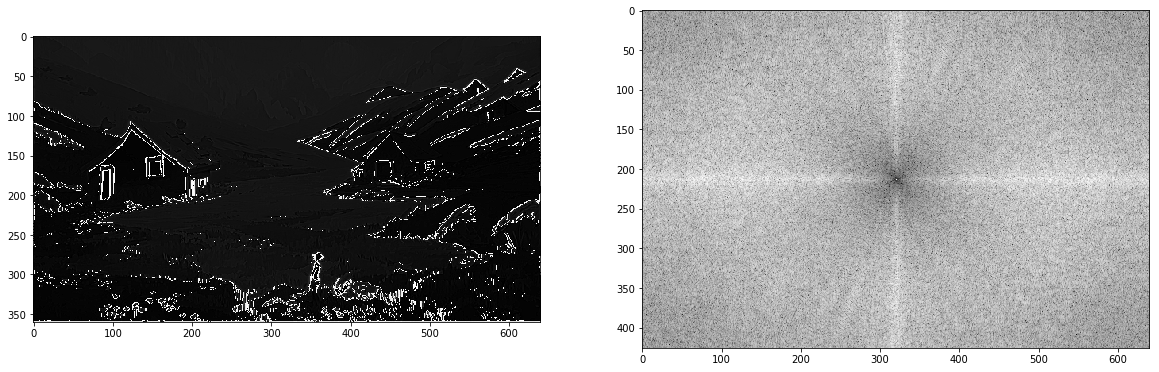

<Figure size 1440x720 with 0 Axes>

In [29]:
fsm = fshift4.copy()
for i in range(M4):
    for j in range(N4):
        fsm[i,j] = fsm[i,j] * passaAltaGauss(M,N,i,j,70)
        
magnitude_spectrum4 = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(fsm))), cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum4, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


<Figure size 1440x720 with 0 Axes>

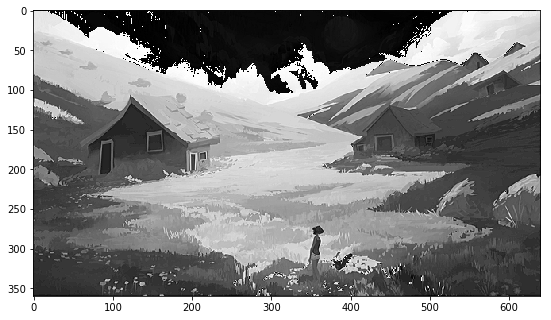

<Figure size 1440x720 with 0 Axes>

In [30]:
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(fshift4 + fsm))), cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))